In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# must execute the following code for github interactions:
%cd /content/gdrive/MyDrive/github_version
#! git clone https://github.com/dmanzan1/CV-Calligraphy.git
#! git pull

/content/gdrive/MyDrive/github_version


In [3]:
%cd CV-Calligraphy/code

/content/gdrive/MyDrive/github_version/CV-Calligraphy/code


In [5]:
# execution call to obtain the overall testing metrics of the model
! python run.py --evaluate --load-checkpoint checkpoints/your_model/050922-234403/your.weights.e024-acc0.8864.h5

Found 1021 images belonging to 29 classes.
Found 202 images belonging to 29 classes.
7/7 [==============================] - 51s 6s/step - loss: 0.6289 - sparse_categorical_accuracy: 0.8911


In [14]:
# execution call to obtain a prediction from a full word image
! python run.py --load-checkpoint checkpoints/your_model/050922-234403/your.weights.e024-acc0.8864.h5 --read "/content/gdrive/MyDrive/github_version/Final_Project_Data/Words/omi.png"

Found 1021 images belonging to 29 classes.
Found 202 images belonging to 29 classes.
pph


Below is a demo of what the images look like after our custom preprocessing function. Dimensions are standardized, and color values are adjusted to be either 1 or 0.

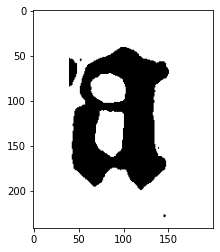

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from skimage import io
import torch
from torch import nn
import matplotlib.pyplot as plt

data_path = "content/gdrive/MyDrive/Final_Project_Data/"
test_img_path = "/content/gdrive/MyDrive/Final_Project_Data/a/d_a1.png"
whole_text_path = "/content/gdrive/MyDrive/Final_Project_Data/whole_text.png"

test_img = io.imread(test_img_path)

tensor = tf.cast(test_img, dtype=tf.float32)
normed = (tensor - tf.reduce_min(tensor)) / (tf.reduce_max(tensor) - tf.reduce_min(tensor))
normed = 1 - normed
resized = tf.image.resize_with_pad(normed, 242, 200)
gray_scale = tf.math.reduce_mean(resized, axis=2)
denoise = tf.where(gray_scale < 0.2, x=0, y=1)
plt.imshow(1 - denoise, cmap='gray')